# Predicting Next Cache Occurance using LSTM

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\emyli\AppData\Roaming\Python\Python36\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (ty

In [2]:
df = pd.read_csv('prepared_new.csv')

In [3]:
df

,Unnamed: 0,Time,Cache_id,no,cache_occurance,cache_next
0,0,2020-05-22 05:55:46.378307,2,0,1,2.0
1,1,2020-05-22 05:58:46.378307,16,1,1,31.0
2,2,2020-05-22 06:01:46.378307,2,2,2,2.0
3,3,2020-05-22 06:04:46.378307,20,3,1,135.0
4,4,2020-05-22 06:07:46.378307,2,4,3,1.0
...,...,...,...,...,...,...
1995,1995,2020-05-26 09:40:46.378307,2,1995,582,1.0
1996,1996,2020-05-26 09:43:46.378307,2,1996,583,1.0
1997,1997,2020-05-26 09:46:46.378307,2,1997,584,NaN
1998,1998,2020-05-26 09:49:46.378307,7,1998,80,NaN


In [4]:
new_df = df.filter(['Time', 'Cache_id', 'no', 'cache_occurance', 'cache_next'])

In [5]:
new_df

,Time,Cache_id,no,cache_occurance,cache_next
0,2020-05-22 05:55:46.378307,2,0,1,2.0
1,2020-05-22 05:58:46.378307,16,1,1,31.0
2,2020-05-22 06:01:46.378307,2,2,2,2.0
3,2020-05-22 06:04:46.378307,20,3,1,135.0
4,2020-05-22 06:07:46.378307,2,4,3,1.0
...,...,...,...,...,...
1995,2020-05-26 09:40:46.378307,2,1995,582,1.0
1996,2020-05-26 09:43:46.378307,2,1996,583,1.0
1997,2020-05-26 09:46:46.378307,2,1997,584,NaN
1998,2020-05-26 09:49:46.378307,7,1998,80,NaN


In [6]:
new_df.set_index('Time')

,Cache_id,no,cache_occurance,cache_next
Time,,,,
2020-05-22 05:55:46.378307,2,0,1,2.0
2020-05-22 05:58:46.378307,16,1,1,31.0
2020-05-22 06:01:46.378307,2,2,2,2.0
2020-05-22 06:04:46.378307,20,3,1,135.0
2020-05-22 06:07:46.378307,2,4,3,1.0
...,...,...,...,...
2020-05-26 09:40:46.378307,2,1995,582,1.0
2020-05-26 09:43:46.378307,2,1996,583,1.0
2020-05-26 09:46:46.378307,2,1997,584,NaN


In [7]:
new_df['Time']

0       2020-05-22 05:55:46.378307
1       2020-05-22 05:58:46.378307
2       2020-05-22 06:01:46.378307
3       2020-05-22 06:04:46.378307
4       2020-05-22 06:07:46.378307
                   ...            
1995    2020-05-26 09:40:46.378307
1996    2020-05-26 09:43:46.378307
1997    2020-05-26 09:46:46.378307
1998    2020-05-26 09:49:46.378307
1999    2020-05-26 09:52:46.378307
Name: Time, Length: 2000, dtype: object

In [8]:
new_df['Time'] = pd.to_datetime(new_df['Time'], infer_datetime_format=True)

In [9]:
new_df['Time']

0      2020-05-22 05:55:46.378307
1      2020-05-22 05:58:46.378307
2      2020-05-22 06:01:46.378307
3      2020-05-22 06:04:46.378307
4      2020-05-22 06:07:46.378307
                  ...            
1995   2020-05-26 09:40:46.378307
1996   2020-05-26 09:43:46.378307
1997   2020-05-26 09:46:46.378307
1998   2020-05-26 09:49:46.378307
1999   2020-05-26 09:52:46.378307
Name: Time, Length: 2000, dtype: datetime64[ns]

In [10]:
l = list(df['cache_next'])
j = l[-1]
l.index(j)
l[-200:]

[60.0,
 1.0,
 5.0,
 1.0,
 2.0,
 32.0,
 2.0,
 9.0,
 2.0,
 60.0,
 2.0,
 10.0,
 6.0,
 22.0,
 3.0,
 37.0,
 13.0,
 14.0,
 5.0,
 3.0,
 39.0,
 6.0,
 3.0,
 1.0,
 9.0,
 1.0,
 67.0,
 14.0,
 77.0,
 13.0,
 13.0,
 8.0,
 4.0,
 1.0,
 11.0,
 14.0,
 54.0,
 67.0,
 58.0,
 9.0,
 21.0,
 12.0,
 21.0,
 72.0,
 10.0,
 1.0,
 1.0,
 3.0,
 38.0,
 8.0,
 1.0,
 4.0,
 6.0,
 22.0,
 48.0,
 13.0,
 85.0,
 5.0,
 37.0,
 7.0,
 52.0,
 36.0,
 5.0,
 1.0,
 1.0,
 12.0,
 4.0,
 7.0,
 3.0,
 63.0,
 3.0,
 1.0,
 4.0,
 49.0,
 33.0,
 46.0,
 2.0,
 10.0,
 2.0,
 13.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 4.0,
 2.0,
 19.0,
 12.0,
 2.0,
 4.0,
 8.0,
 17.0,
 34.0,
 89.0,
 3.0,
 15.0,
 26.0,
 5.0,
 2.0,
 25.0,
 9.0,
 nan,
 32.0,
 30.0,
 nan,
 2.0,
 12.0,
 8.0,
 21.0,
 3.0,
 37.0,
 69.0,
 1.0,
 3.0,
 57.0,
 10.0,
 1.0,
 11.0,
 1.0,
 20.0,
 3.0,
 27.0,
 28.0,
 29.0,
 13.0,
 2.0,
 10.0,
 8.0,
 2.0,
 3.0,
 8.0,
 34.0,
 13.0,
 51.0,
 nan,
 8.0,
 18.0,
 20.0,
 3.0,
 5.0,
 nan,
 1.0,
 4.0,
 15.0,
 19.0,
 15.0,
 3.0,
 nan,
 8.0,
 2.0,
 3.0,
 4.0,
 nan,
 19.0,

In [11]:
df = new_df[:-150]
df.shape

(1850, 5)

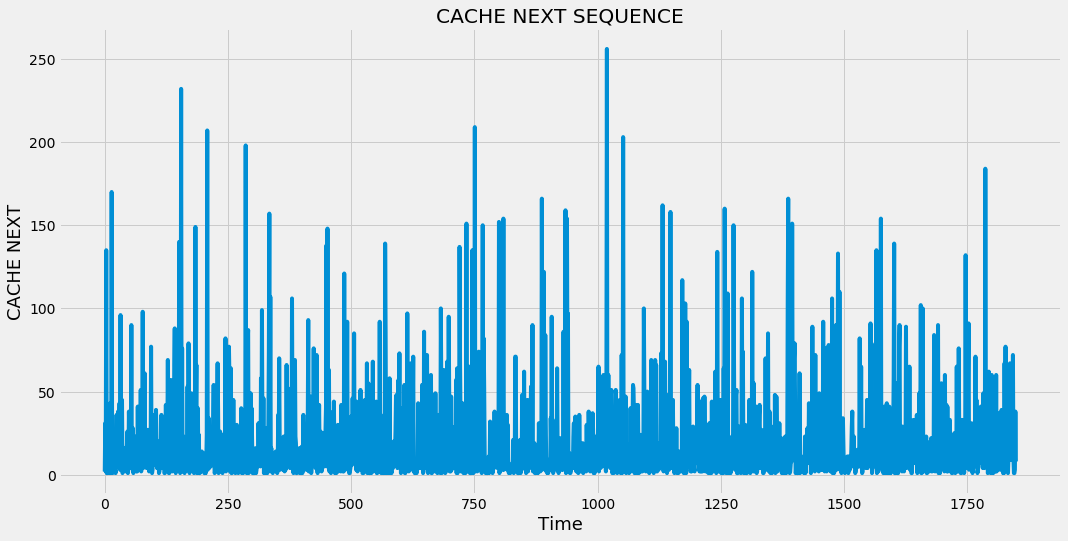

In [12]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('CACHE NEXT SEQUENCE')
plt.plot(df['cache_next'])
plt.xlabel('Time',fontsize=18)
plt.ylabel('CACHE NEXT',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the cache_next column
data = df.filter(['cache_next'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
# LSTM accepts only 3 dimentionaly shape
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Cache_next', fontsize=18)
plt.plot(train['cache_next'])
plt.plot(valid[['cache_next', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## prediction for different cache_id

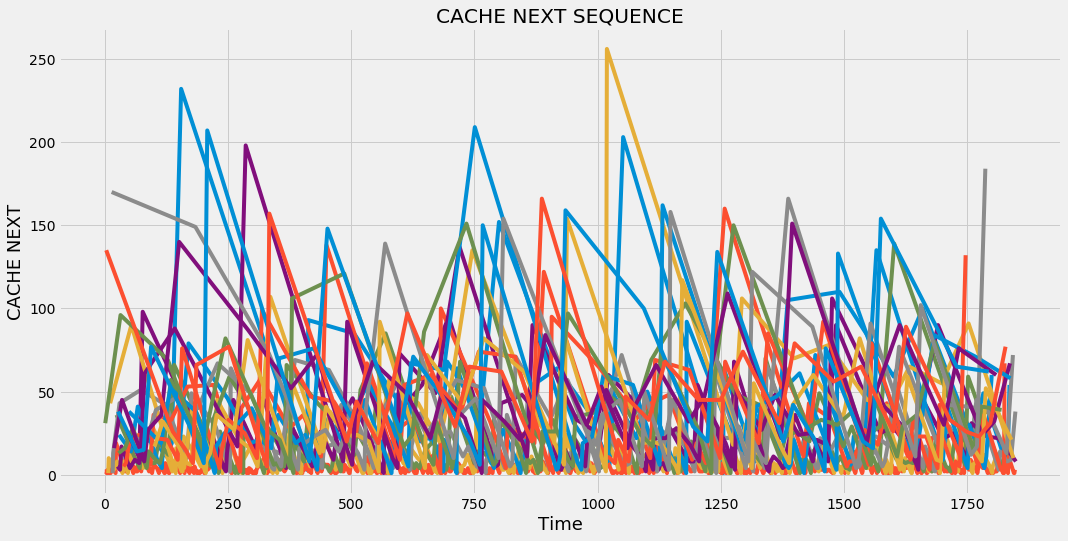

In [13]:
#Visualize the diiferent cache_id
plt.figure(figsize=(16,8))
plt.title('CACHE NEXT SEQUENCE')

for i in range(1,21):
    plt.plot(df[df['Cache_id']==i]['cache_next'], label=i)
plt.xlabel('Time',fontsize=18)
plt.ylabel('CACHE NEXT',fontsize=18)
plt.show()

In [14]:
data_p = []
for i in range(1,21):
    data_p.append(df[df['Cache_id']==i])

In [15]:
#Create a new dataframe with only the cache_next column
new_data = {}
for i in range(len(data_p)):
    new_data[i] = {'data': data_p[i].filter(['cache_next'])}
    #Converting the dataframe to a numpy array
    new_data[i]['dataset'] = new_data[i]['data'].values
    #Get /Compute the number of rows to train the model on
    new_data[i]['training_data_len'] = math.ceil( len(new_data[i]['dataset']) *.8)

In [16]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
for i in range(len(data_p)):
    new_data[i]['scaled_data'] = scaler.fit_transform(new_data[i]['dataset'])

In [18]:
#Create the scaled training data set 
col_no = 10    #no of columns
for i in range(len(data_p)):
    new_data[i]['train_data'] = new_data[i]['scaled_data'][0:new_data[i]['training_data_len']  , : ]
    #Split the data into x_train and y_train data sets
    new_data[i]['x_train']=[]
    new_data[i]['y_train'] = []
    for j in range(col_no,len(new_data[i]['train_data'])):
        new_data[i]['x_train'].append(new_data[i]['train_data'][j-col_no:j,0])
        new_data[i]['y_train'].append(new_data[i]['train_data'][j,0])

In [19]:
#Convert x_train and y_train to numpy arrays
for i in range(len(data_p)):
    new_data[i]['x_train']= np.array(new_data[i]['x_train'])
    new_data[i]['y_train'] =np.array(new_data[i]['y_train'])

In [20]:
#Reshape the data into the shape accepted by the LSTM
# LSTM accepts only 3 dimentionaly shape
for i in range(len(data_p)):
    x = new_data[i]['x_train']
    print(x.shape)
    new_data[i]['x_train'] = np.reshape(x, (x.shape[0],x.shape[1],1))

(21, 10)
(420, 10)
(188, 10)
(109, 10)
(82, 10)
(61, 10)
(50, 10)
(45, 10)
(22, 10)
(42, 10)
(34, 10)
(29, 10)
(25, 10)
(24, 10)
(36, 10)
(22, 10)
(20, 10)
(21, 10)
(18, 10)
(20, 10)


In [21]:
# New shape
for i in range(len(data_p)):
    print(new_data[i]['x_train'].shape)

(21, 10, 1)
(420, 10, 1)
(188, 10, 1)
(109, 10, 1)
(82, 10, 1)
(61, 10, 1)
(50, 10, 1)
(45, 10, 1)
(22, 10, 1)
(42, 10, 1)
(34, 10, 1)
(29, 10, 1)
(25, 10, 1)
(24, 10, 1)
(36, 10, 1)
(22, 10, 1)
(20, 10, 1)
(21, 10, 1)
(18, 10, 1)
(20, 10, 1)


In [55]:
#Build the LSTM network model
# units=50 => this is the number of neurons 
for i in range(len(data_p)):
    new_data[i]['model'] = Sequential()
    new_data[i]['model'].add(LSTM(units=100, return_sequences=True,input_shape=(new_data[i]['x_train'].shape[1],1)))
    new_data[i]['model'].add(LSTM(units=100, return_sequences=True))
    new_data[i]['model'].add(LSTM(units=100, return_sequences=True))
    new_data[i]['model'].add(LSTM(units=100, return_sequences=False))
    new_data[i]['model'].add(Dense(units=50))
    new_data[i]['model'].add(Dense(units=50))
    new_data[i]['model'].add(Dense(units=25))
    new_data[i]['model'].add(Dense(units=25))
    new_data[i]['model'].add(Dense(units=1))

In [56]:
#Compile the model
for i in range(len(data_p)):
    new_data[i]['model'].compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
for i in range(len(data_p)):
    new_data[i]['model'].fit(new_data[i]['x_train'], new_data[i]['y_train'], batch_size=1, epochs=30)

Epoch 1/30
21/21 [==============================] - 5s 260ms/step - loss: 0.0503
Epoch 2/30
21/21 [==============================] - 5s 261ms/step - loss: 0.0507
Epoch 3/30
21/21 [==============================] - 6s 293ms/step - loss: 0.0522
Epoch 4/30
21/21 [==============================] - 6s 274ms/step - loss: 0.0517
Epoch 5/30
21/21 [==============================] - 7s 320ms/step - loss: 0.0530
Epoch 6/30
21/21 [==============================] - 6s 265ms/step - loss: 0.0529
Epoch 7/30
21/21 [==============================] - 6s 266ms/step - loss: 0.0527
Epoch 8/30
21/21 [==============================] - 6s 262ms/step - loss: 0.0490
Epoch 9/30
21/21 [==============================] - 5s 262ms/step - loss: 0.0536
Epoch 10/30
21/21 [==============================] - 5s 259ms/step - loss: 0.0516
Epoch 11/30
21/21 [==============================] - 6s 264ms/step - loss: 0.0486
Epoch 12/30
21/21 [==============================] - 5s 262ms/step - loss: 0.0537
Epoch 13/30
21/21 [======

109/109 [==============================] - 28s 257ms/step - loss: 0.0285
Epoch 9/30
109/109 [==============================] - 33s 301ms/step - loss: 0.0285
Epoch 10/30
109/109 [==============================] - 28s 256ms/step - loss: 0.0293
Epoch 11/30
109/109 [==============================] - 28s 259ms/step - loss: 0.0284
Epoch 12/30
109/109 [==============================] - 28s 256ms/step - loss: 0.0281
Epoch 13/30
109/109 [==============================] - 28s 258ms/step - loss: 0.0287
Epoch 14/30
109/109 [==============================] - 28s 257ms/step - loss: 0.0288
Epoch 15/30
109/109 [==============================] - 28s 256ms/step - loss: 0.0286
Epoch 16/30
109/109 [==============================] - 36s 326ms/step - loss: 0.0285
Epoch 17/30
109/109 [==============================] - 43s 395ms/step - loss: 0.0284
Epoch 18/30
109/109 [==============================] - 42s 387ms/step - loss: 0.0287
Epoch 19/30
109/109 [==============================] - 44s 407ms/step - loss: 

50/50 [==============================] - 13s 264ms/step - loss: 0.0222
Epoch 17/30
50/50 [==============================] - 13s 259ms/step - loss: 0.0225
Epoch 18/30
50/50 [==============================] - 13s 260ms/step - loss: 0.0227
Epoch 19/30
50/50 [==============================] - 13s 262ms/step - loss: 0.0226
Epoch 20/30
50/50 [==============================] - 13s 260ms/step - loss: 0.0226
Epoch 21/30
50/50 [==============================] - 13s 259ms/step - loss: 0.0221
Epoch 22/30
50/50 [==============================] - 13s 260ms/step - loss: 0.0223
Epoch 23/30
50/50 [==============================] - 13s 261ms/step - loss: 0.0230
Epoch 24/30
50/50 [==============================] - 13s 260ms/step - loss: 0.0225
Epoch 25/30
50/50 [==============================] - 13s 261ms/step - loss: 0.0219
Epoch 26/30
50/50 [==============================] - 13s 260ms/step - loss: 0.0225
Epoch 27/30
50/50 [==============================] - 13s 262ms/step - loss: 0.0225
Epoch 28/30
50/5

42/42 [==============================] - 12s 292ms/step - loss: 0.0323
Epoch 26/30
42/42 [==============================] - 12s 294ms/step - loss: 0.0318
Epoch 27/30
42/42 [==============================] - 12s 291ms/step - loss: 0.0323
Epoch 28/30
42/42 [==============================] - 12s 292ms/step - loss: 0.0319
Epoch 29/30
42/42 [==============================] - 12s 291ms/step - loss: 0.0331
Epoch 30/30
42/42 [==============================] - 13s 317ms/step - loss: 0.0333
Epoch 1/30
34/34 [==============================] - 11s 315ms/step - loss: 0.0396
Epoch 2/30
34/34 [==============================] - 12s 342ms/step - loss: 0.0406
Epoch 3/30
34/34 [==============================] - 11s 321ms/step - loss: 0.0431
Epoch 4/30
34/34 [==============================] - 12s 339ms/step - loss: 0.0435
Epoch 5/30
34/34 [==============================] - 13s 370ms/step - loss: 0.0419
Epoch 6/30
34/34 [==============================] - 12s 360ms/step - loss: 0.0382
Epoch 7/30
34/34 [====

In [58]:
#Test data set
for i in range(len(data_p)):
    new_data[i]['test_data'] = new_data[i]['scaled_data'][new_data[i]['training_data_len'] - col_no: , : ]
    #Create the x_test and y_test data sets
    new_data[i]['x_test'] = []
    new_data[i]['y_test'] =  new_data[i]['dataset'][new_data[i]['training_data_len'] : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
    for j in range(col_no,len(new_data[i]['test_data'])):
        new_data[i]['x_test'].append(new_data[i]['test_data'][j-col_no:j,0])

In [59]:
#Convert x_test to a numpy array 
for i in range(len(data_p)):
    new_data[i]['x_test'] = np.array(new_data[i]['x_test'])

In [60]:
#Reshape the data into the shape accepted by the LSTM
for i in range(len(data_p)):
    new_data[i]['x_test'] = np.reshape(new_data[i]['x_test'], (new_data[i]['x_test'].shape[0],new_data[i]['x_test'].shape[1],1))

In [61]:
#Getting the models predicted price values
for i in range(len(data_p)):
    new_data[i]['predictions'] = new_data[i]['model'].predict(new_data[i]['x_test']) 
    new_data[i]['predictions'] = scaler.inverse_transform(new_data[i]['predictions'])#Undo scaling

In [62]:
#Calculate/Get the value of RMSE
t = 1
for i in range(len(data_p)):
    rmse=np.sqrt(np.mean(((new_data[i]['predictions']- new_data[i]['y_test'])**2)))
    print(f'Error for {t} = {rmse}')
    t += 1

Error for 1 = 41.5290045321075
Error for 2 = 19.755689620403807
Error for 3 = 30.746193050470655
Error for 4 = 15.3623049508241
Error for 5 = 25.216259774337956
Error for 6 = 20.46214373240007
Error for 7 = 35.22733303792279
Error for 8 = 24.669880823039453
Error for 9 = 27.025811679491454
Error for 10 = 32.325216112109196
Error for 11 = 23.703970863767154
Error for 12 = 38.751357192979995
Error for 13 = 45.97327961387818
Error for 14 = 45.47492119808895
Error for 15 = 27.926005596377777
Error for 16 = 24.68993102265787
Error for 17 = 61.942023651800866
Error for 18 = 47.25511592115331
Error for 19 = 54.32282458834378
Error for 20 = 28.071787978268958


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


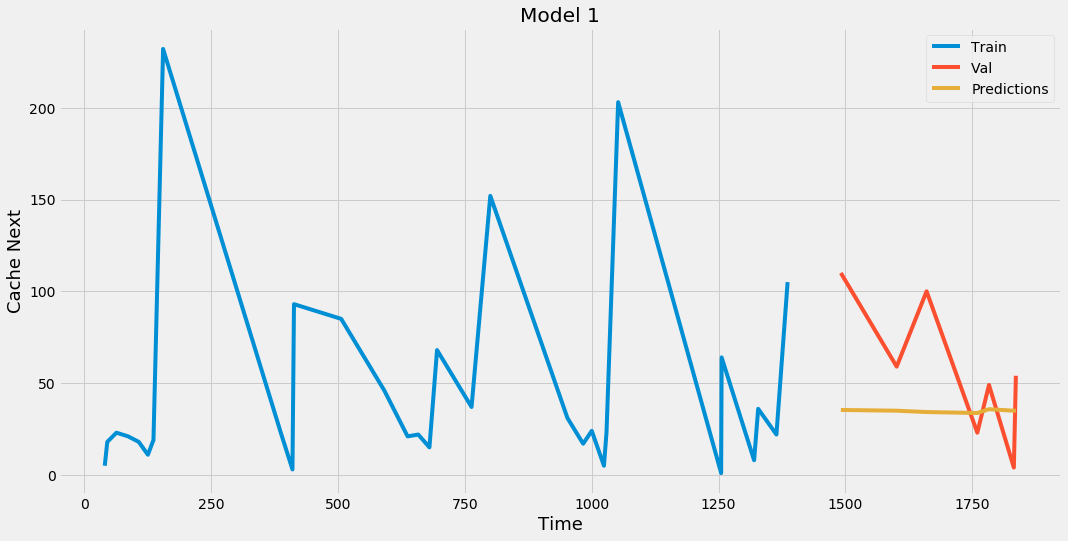

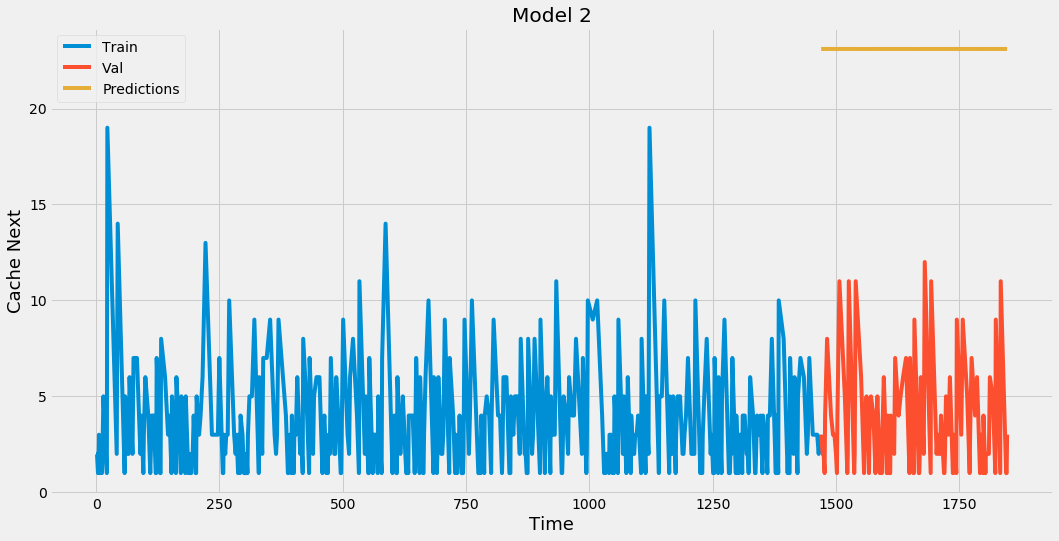

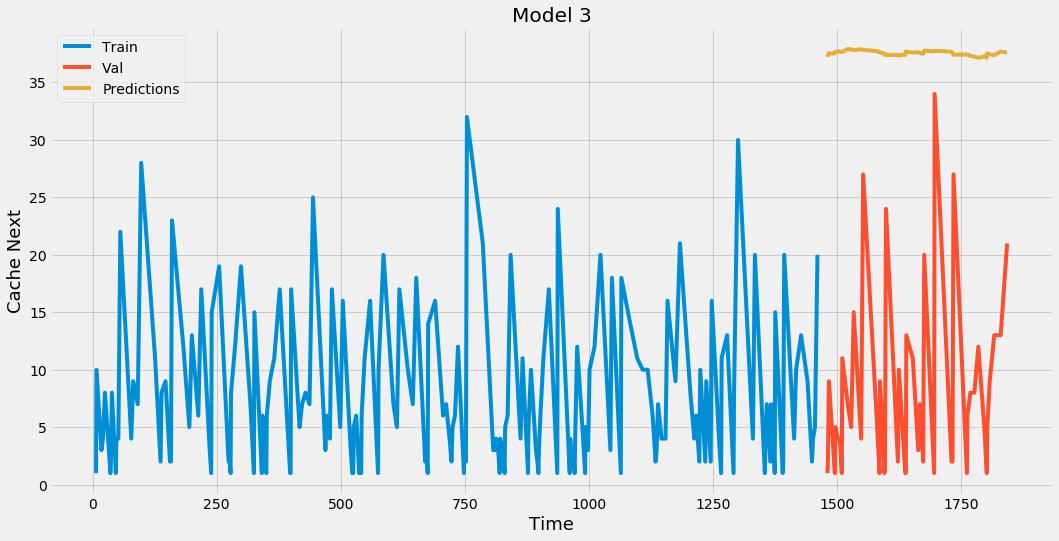

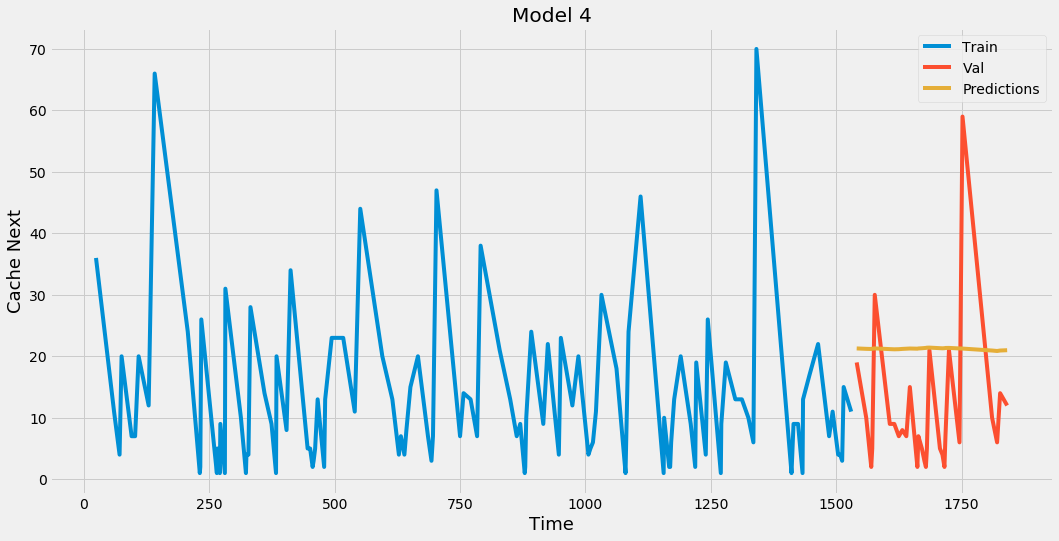

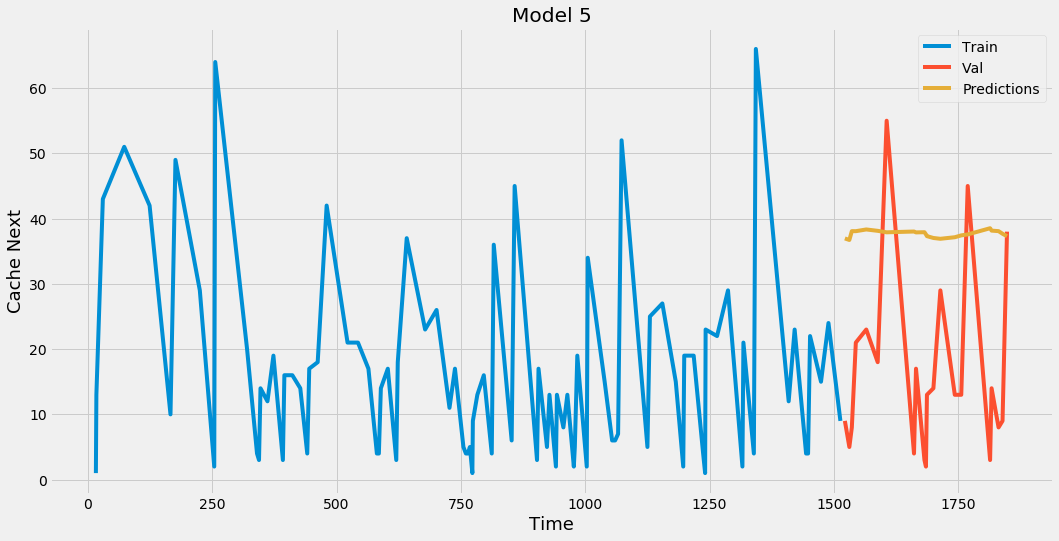

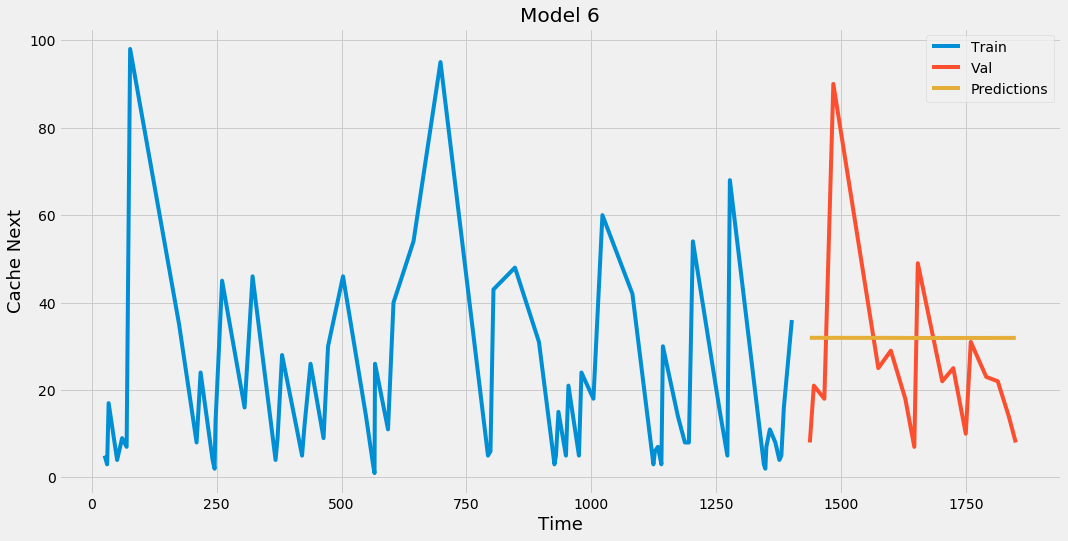

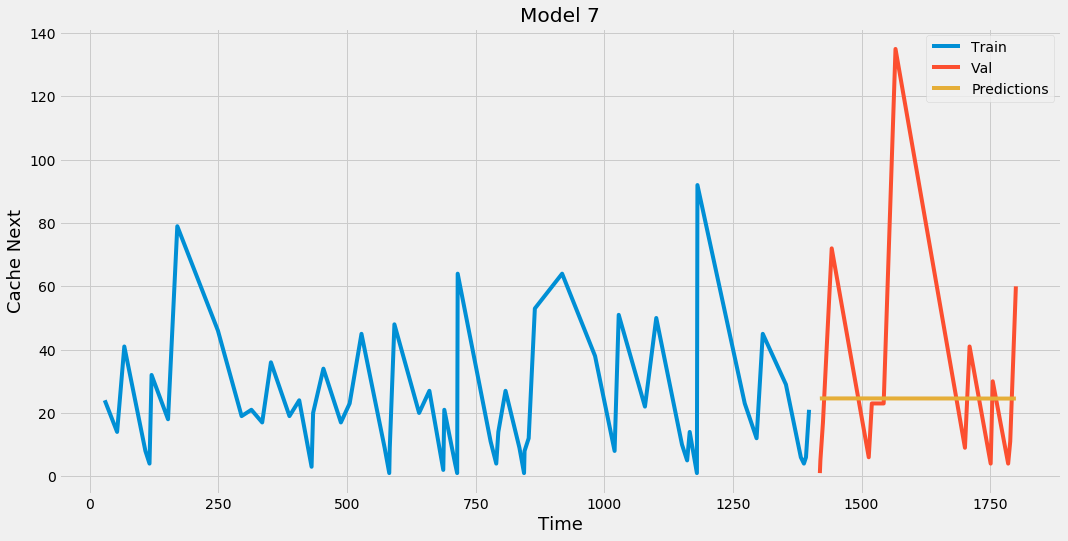

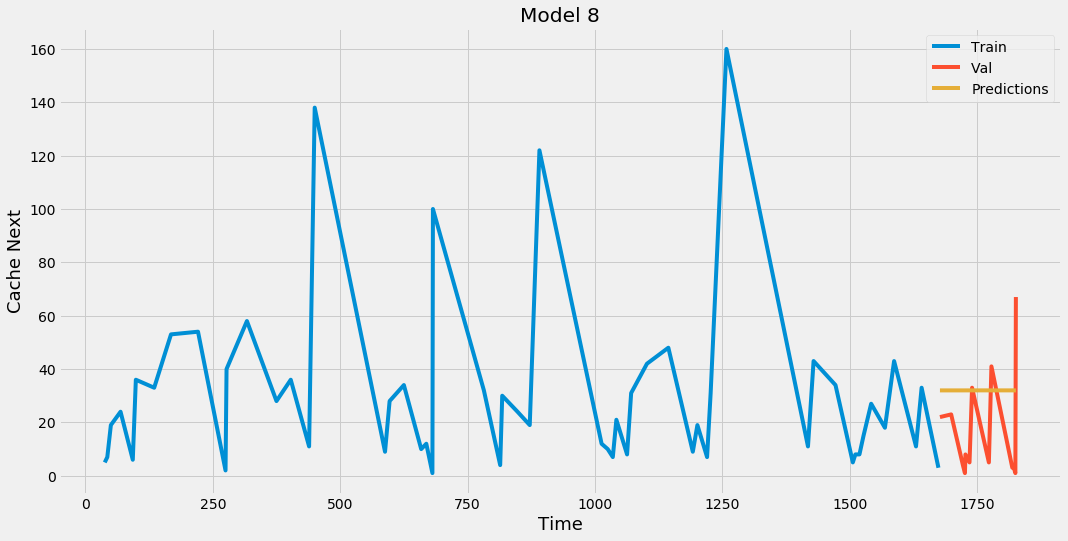

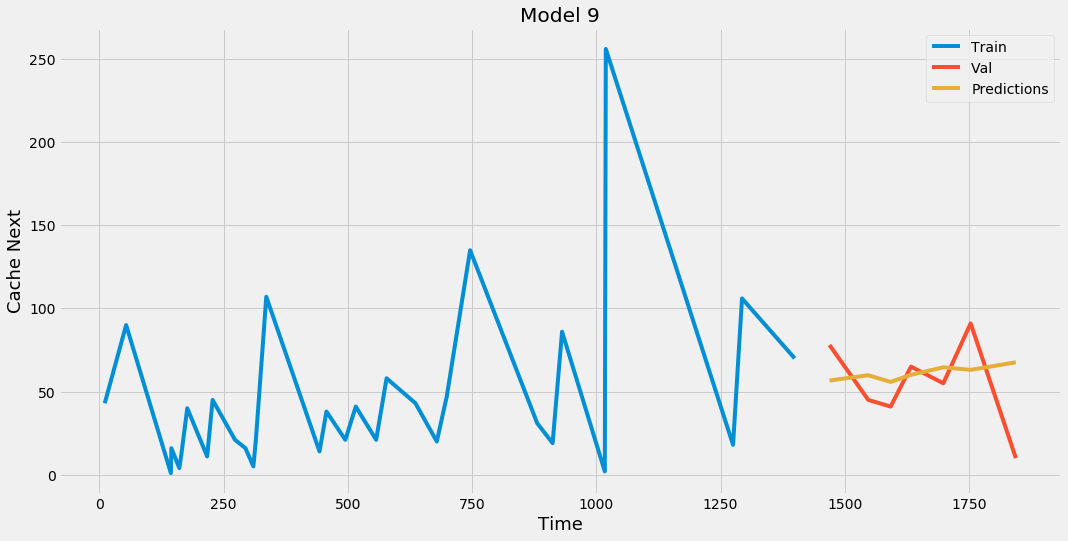

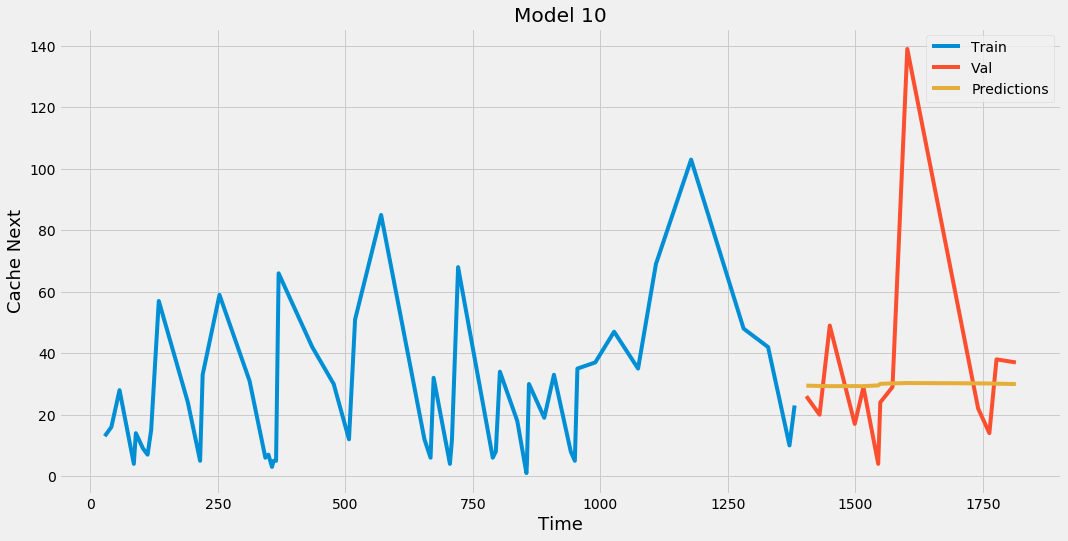

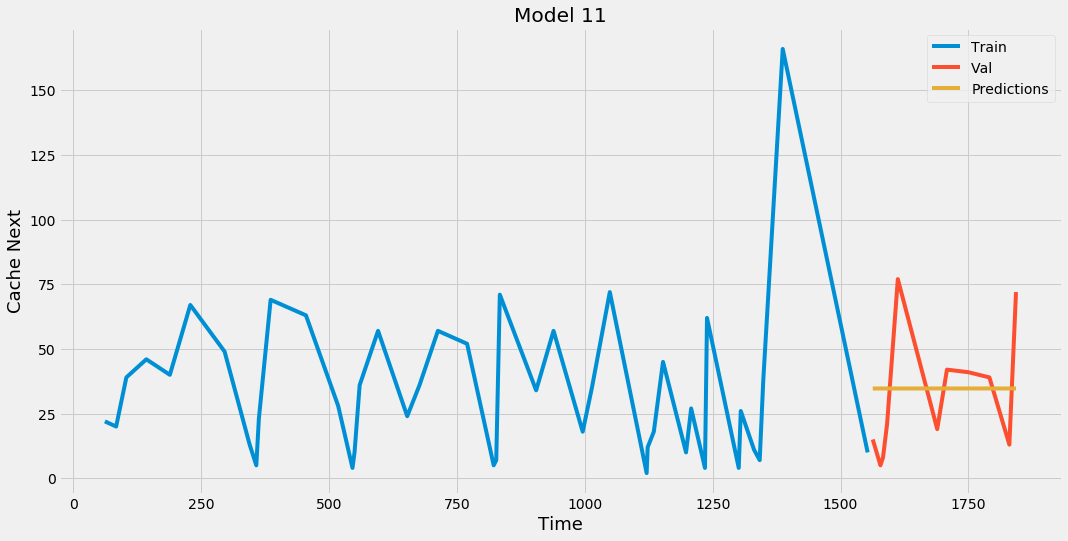

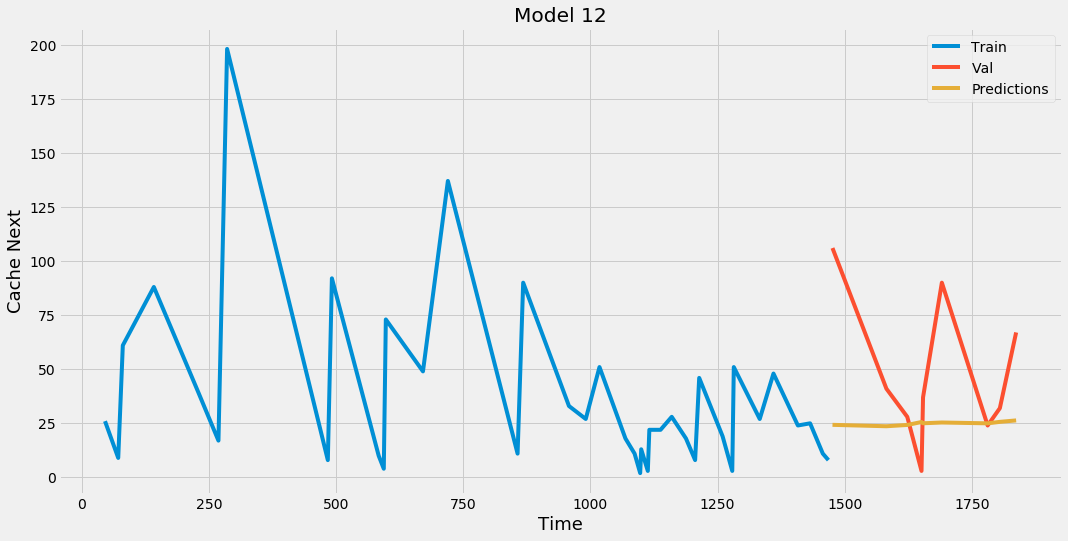

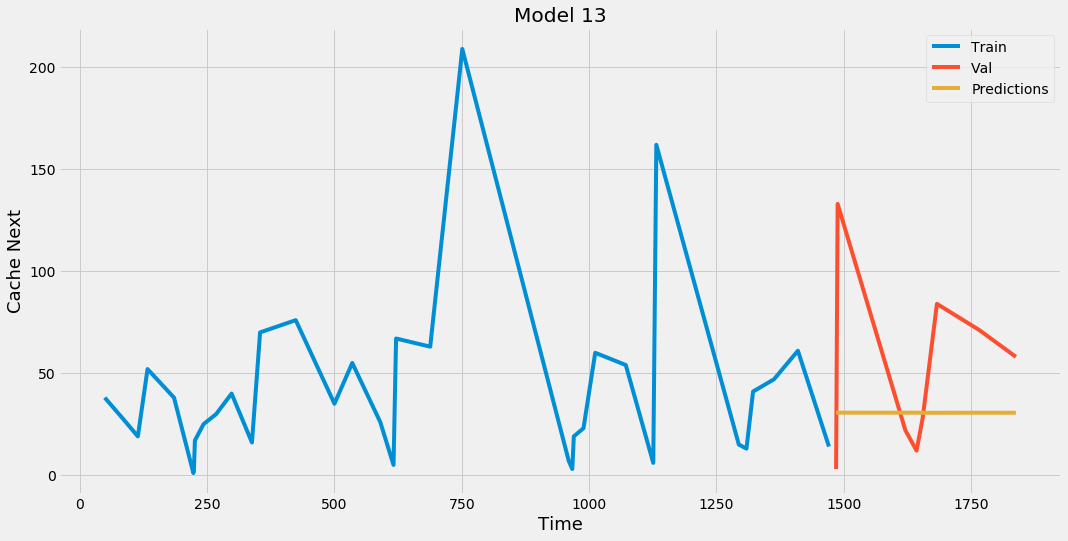

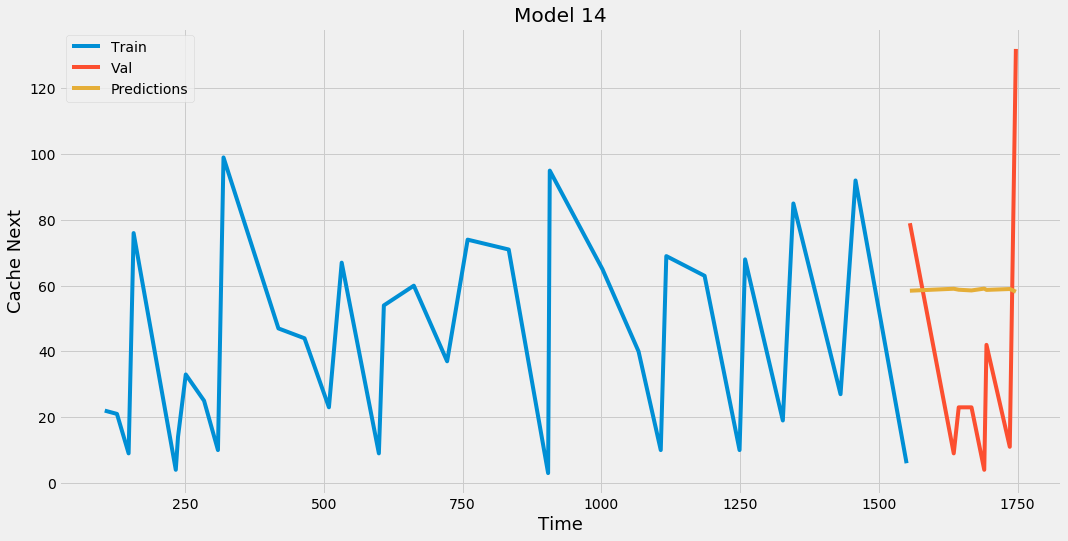

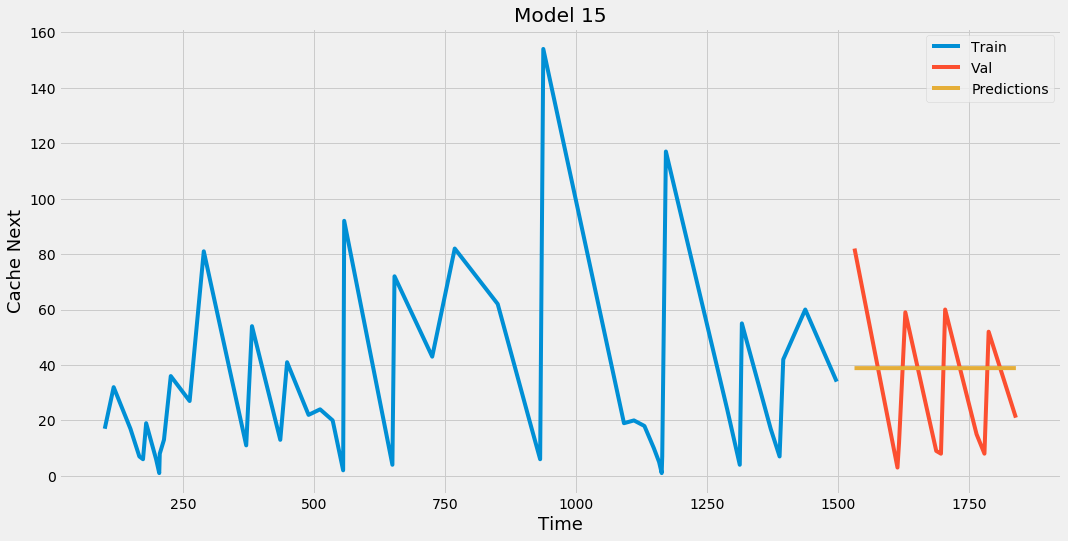

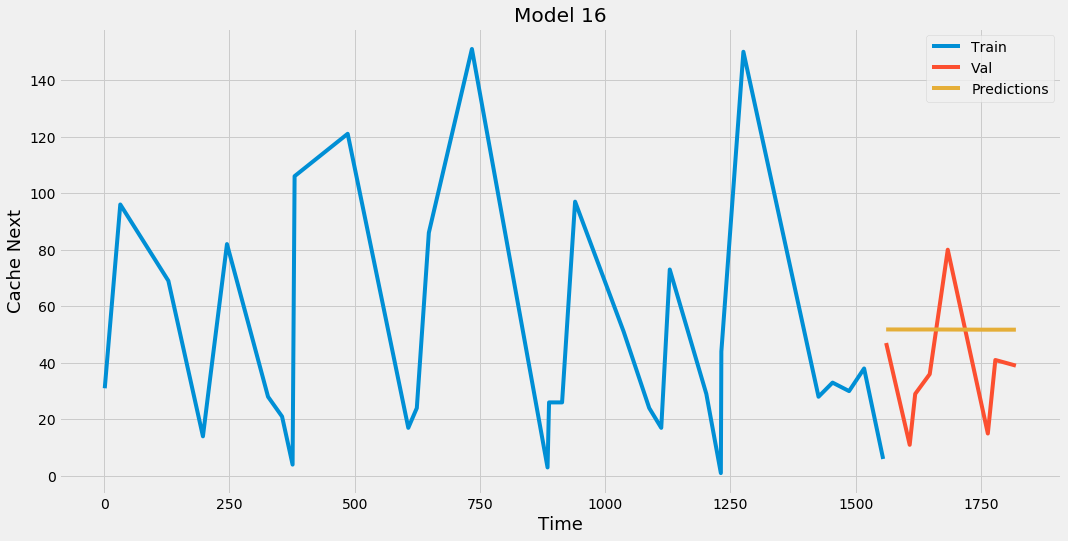

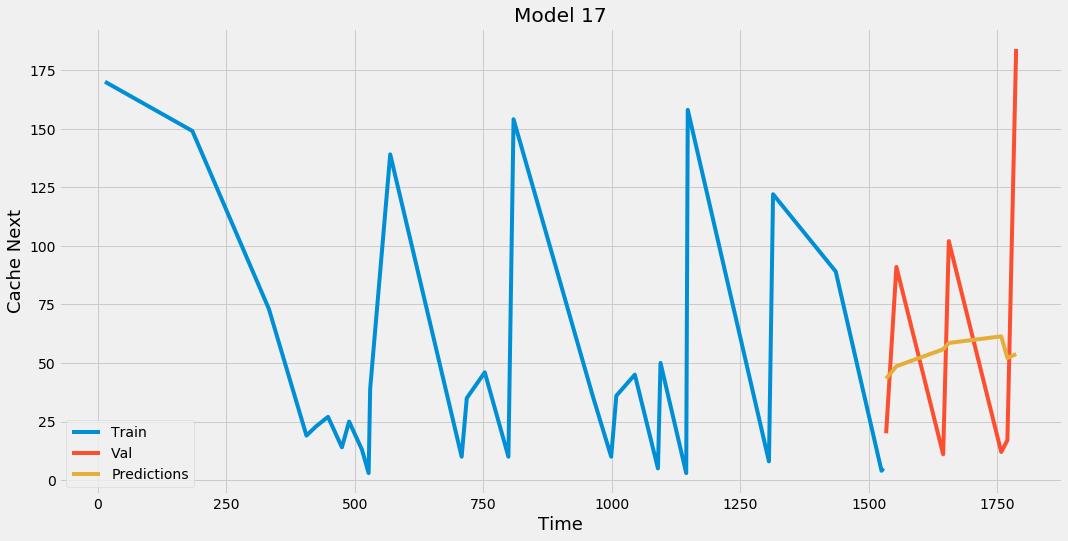

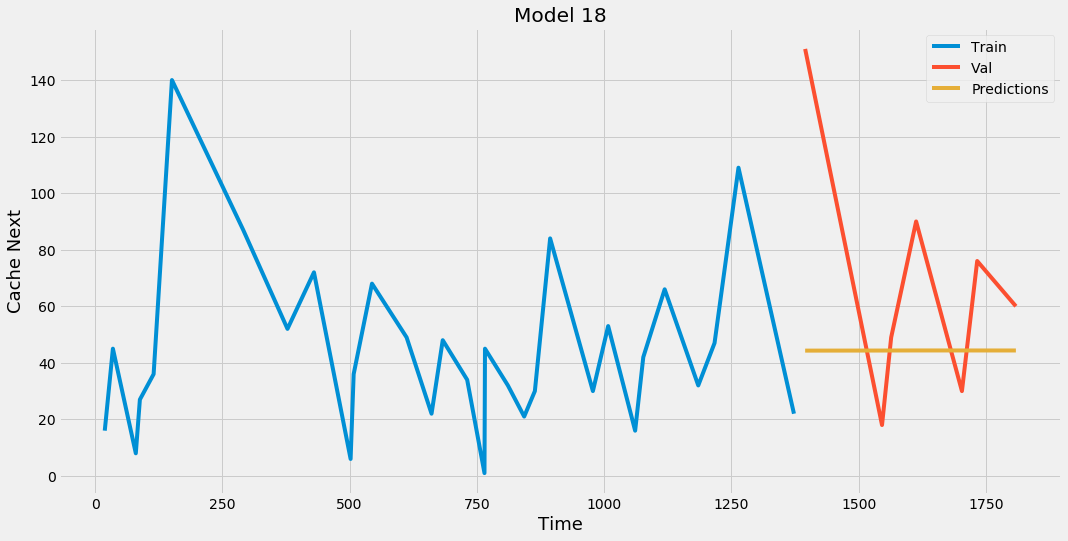

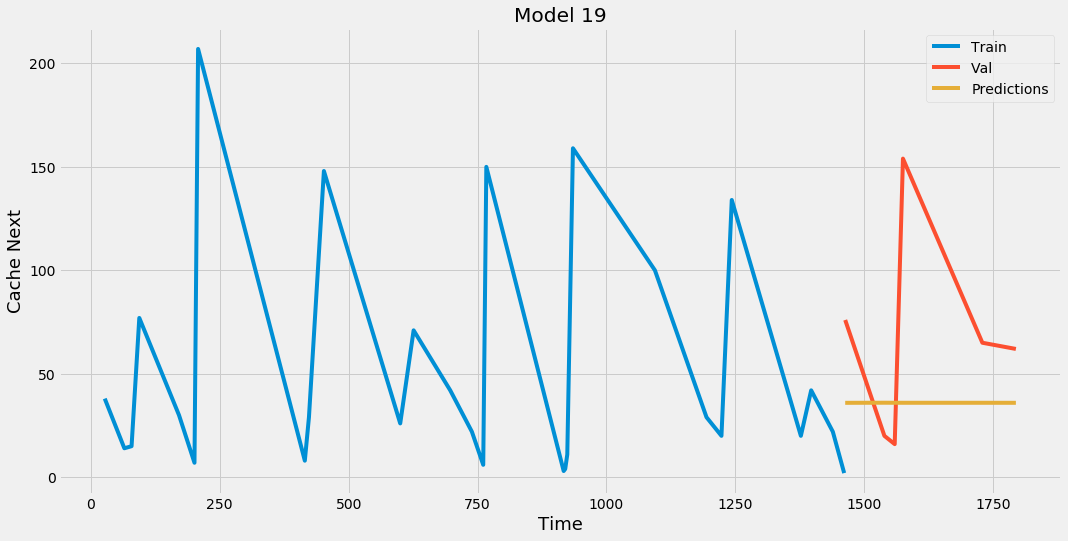

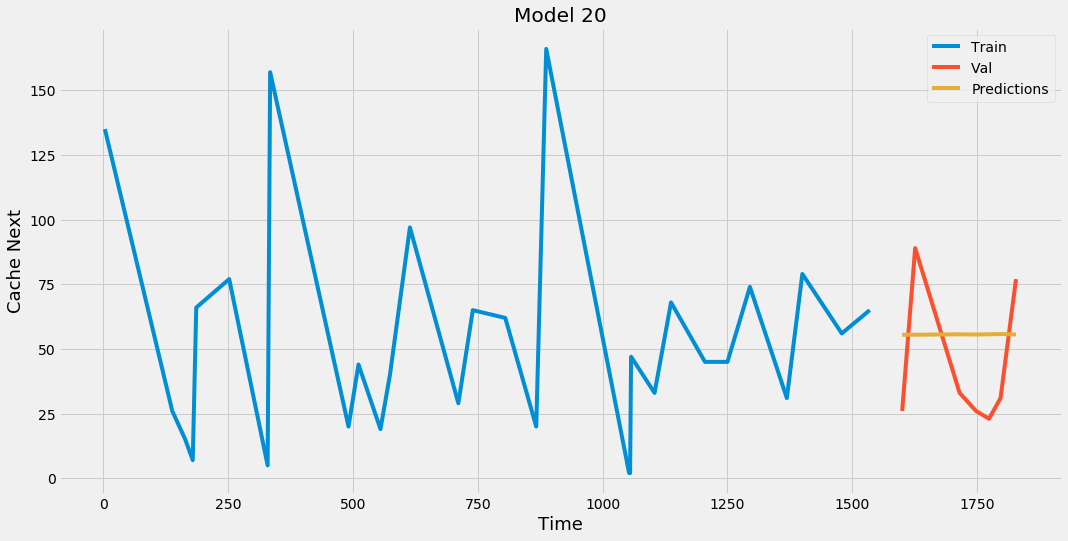

In [63]:
#Plot/Create the data for the graph
t = 1
for i in range(len(data_p)):
    new_data[i]['train'] = new_data[i]['data'][:new_data[i]['training_data_len']]
    new_data[i]['valid'] = new_data[i]['data'][new_data[i]['training_data_len']:]
    new_data[i]['valid']['Predictions'] = new_data[i]['predictions']
    
    #Visualize the data
    plt.figure(figsize=(16,8))
    plt.title(f'Model {t}')
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Cache Next', fontsize=18)
    plt.plot(new_data[i]['train']['cache_next'])
    plt.plot(new_data[i]['valid'][['cache_next', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'])
    plt.show()
    t+=1

In [54]:
for i in range(len(data_p)):
    print(new_data[i]['valid'].head())

      cache_next  Predictions
1491       110.0    42.488800
1601        59.0    36.417831
1660       100.0    34.341831
1760        23.0    31.110794
1783        49.0    34.787502
      cache_next  Predictions
1470         3.0    23.011757
1473         2.0    23.010685
1475         2.0    23.012072
1477         1.0    23.013443
1478         4.0    23.016188
      cache_next  Predictions
1480         1.0    38.370556
1481         2.0    38.370480
1483         9.0    38.378201
1492         3.0    38.378105
1495         1.0    38.381878
      cache_next  Predictions
1541        19.0    26.286150
1560        10.0    25.899929
1570         2.0    26.011112
1572         5.0    26.598951
1577        30.0    26.805515
      cache_next  Predictions
1522         9.0    30.299761
1531         5.0    30.268757
1536         8.0    30.664888
1544        21.0    30.696234
1565        23.0    30.796263
      cache_next  Predictions
1437         8.0    32.383297
1445        21.0    32.329895
1466      